# 📝 Pattern Recognition & Biometrics. TP Traitement du Langage Naturel ou *NLP (Natural Language Processing)*

Par Omar Galarraga et Sonia Garcia

In [11]:
import numpy as np

Dans ce travail pratique, nous constituerons un *pipeline* de traitement du langage naturel avec différents modèles pour analyser le chapitre I du roman "Le Petit Prince" d'Antoine de Saint-Exupéry

In [17]:
#Modifiez votre chemin d'accès si besoin
with open('lepetitprince_chap1.txt', encoding='utf-8') as f:
    sentences = f.readlines()

## Partie I. *Word embeddings* ou la modélisation des mots

Nous utiliserons les libraries *nltk* et *gensim* pour créer des modèles *word2vec*

* I.1) Convertissez le texte (phrases) en tokens
* I.2) Construisez un modèle *CBOW* et un *skip-gram* avec le corpus du livre


In [36]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
print(tokenized_sentences)




[['Lorsque', 'j', '’', 'avais', 'six', 'ans', 'j', '’', 'ai', 'vu', ',', 'une', 'fois', ',', 'une', 'magnifique', 'image', ',', 'dans', 'un', 'livre', 'sur', 'la', 'Forêt', 'Vierge', 'qui', 's', '’', 'appelait', '«', 'Histoires', 'Vécues', '»', '.'], ['Ça', 'représentait', 'un', 'serpent', 'boa', 'qui', 'avalait', 'un', 'fauve', '.', 'Voilà', 'la', 'copie', 'du', 'dessin', '.'], ['On', 'disait', 'dans', 'le', 'livre', ':', '«', 'Les', 'serpents', 'boas', 'avalent', 'leur', 'proie', 'tout', 'entière', ',', 'sans', 'la', 'mâcher', '.'], ['Ensuite', 'ils', 'ne', 'peuvent', 'plus', 'bouger', 'et', 'ils', 'dorment', 'pendant', 'les', 'six', 'mois', 'de', 'leur', 'digestion', '.', '»'], ['J', '’', 'ai', 'alors', 'beaucoup', 'réfléchi', 'sur', 'les', 'aventures', 'de', 'la', 'jungle', 'et', ',', 'à', 'mon', 'tour', ',', 'j', '’', 'ai', 'réussi', ',', 'avec', 'un', 'crayon', 'de', 'couleur', ',', 'à', 'tracer', 'mon', 'premier', 'dessin', '.'], ['Mon', 'dessin', 'numéro', '1', '.', 'Il', 'étai

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
w2v_cbow = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0)   #CBOW
w2v_sg = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)     #Skip-gram

* I.3) Quel est le vecteur associé au mot "boa" ? Est-il le même dans les deux modèles (*CBOW* et *skip-gram*) ?
* I.4) Quels mots sont "similaires" au mot "boa" ? Sont-ils les mêmes dans les deux modèles ?

In [33]:
boa_cbow = w2v_cbow.wv['boa']
boa_sg = w2v_sg.wv['boa']

similarity = np.dot(boa_cbow, boa_sg) / (np.linalg.norm(boa_cbow) * np.linalg.norm(boa_sg))
print(f"Similarité entre {'boa avec CBOW'} et {'boa avec skip-gram'} : {similarity}")

Similarité entre boa avec CBOW et boa avec skip-gram : 0.0019356902921572328


Pas le même mot mais quasiment le même (au vu de la similarité cosinus proche de 1)

In [30]:
similar_words_boa = w2v_cbow.wv.most_similar('boa')
print(similar_words_boa)

[('carrière', 0.2611195147037506), ('découragé', 0.2579665780067444), ('Chine', 0.2445865422487259), ('au', 0.22318489849567413), ('autre', 0.2174520343542099), ('amélioré', 0.19799430668354034), ('trop', 0.17396698892116547), ('vécu', 0.1704605221748352), ('peu', 0.16810756921768188), ('ne', 0.16546423733234406)]


* I.5) Affichez les graphiques des deux modèles en faisant une réduction de dimension à 2D par t-SNE (voir code d'exemple ci-dessous). Quelles sont les coordonnées en 2D du mot "boa" dans les deux modèles ?

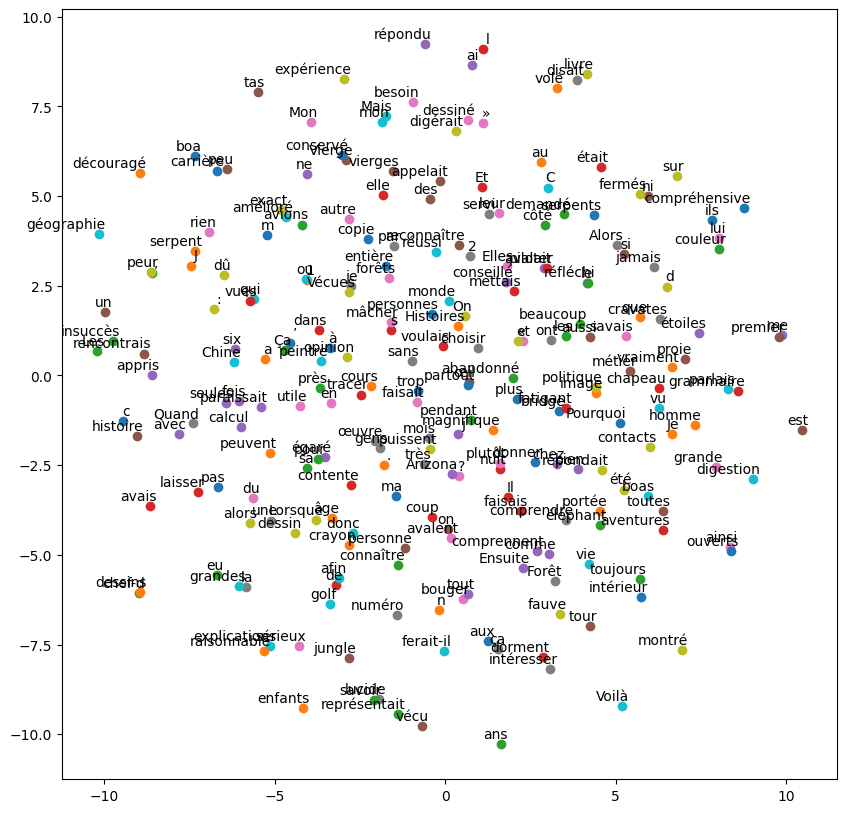

In [21]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Affectez le nom de votre modèle Word2Vec à la variable model_w2v ci-dessous
model_w2v = w2v_cbow

# t-SNE pour réduire à 2 dimensions
word_vectors = model_w2v.wv.vectors
num_samples = len(word_vectors)
tsne_perplexity = min(30, num_samples - 1)  # Perplexity must be less than the number of samples

tsne = TSNE(n_components=2, perplexity=tsne_perplexity, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot the vectors
plt.figure(figsize=(10, 10))
for i, word in enumerate(model_w2v.wv.index_to_key):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

In [24]:
boa_coord = word_vectors_2d[model_w2v.wv.key_to_index['boa']]
print(boa_coord)

[-7.338389  6.127605]


## Partie II. Réseaux de neurones et attention

* II.1) Construisez et entraînez un réseau de neurones dense pour prédire le cinquème token de chaque phrase en fonction des quatre premiers tokens d'un modèle Word2Vec. Quelle est l'erreur d'apprentissage ?
* II.2) Quelle est la dimension de la couche d'entrée ?
* II.3) Quelle est la dimension de la couche de sortie ?
* II.4) Quelle est l'erreur RMS pour la 10ème phrase ?


In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
vocab_len = len(w2v_cbow.wv)
model = Sequential([
    Dense(128, activation='relu', input_shape=(400,)),  # 4 tokens * 100 dimensions
    Dense(128, activation='relu'),
    Dense(100)  # Output layer with 100 dimensions (same as word vector size)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()


c:\Users\skand\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 239)            │        30,831 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,671 (385.43 KB)

 Trainable params: 98,671 (385.43 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
X = []
Y = []
for sentence in tokenized_sentences:
    if len(sentence) < 5:
        continue
    else:
        for i in range(4, len(sentence)):
            context = sentence[i - 4:i]
            target = sentence[i]
            X.append([w2v_cbow.wv[word] for word in context])
            Y.append(w2v_cbow.wv[target])
        
X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])
print(X.shape)
Y = np.array(Y)
print(Y.shape)

(453, 400)
(453, 100)


In [50]:
model.fit(X, Y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


ValueError: Dimensions must be equal, but are 100 and 239 for '{{node compile_loss/mse/sub}} = Sub[T=DT_FLOAT](data_1, sequential_1_1/dense_5_1/Softmax)' with input shapes: [?,100], [?,239].

## Partie III. Transformers


Pour cette partie, nous utiliserons le modèle *CamemBERT*, qui est modèle type BERT (Transformer) spécifique à la langue française. Ce modèle est disponible dans la librairie *Transformers* de *HuggingFace* (documentation disponible sur : https://huggingface.co/docs/transformers/model_doc/camembert). Nous travaillerons le fichier 'lepetitprince_chap1_masked.txt', qui contient des mots masqués.

* III.1) "Tokenisez" le texte. Quelle est la dimension du vecteur de modélisation des tokens ?

In [ ]:
#Ecrivez votre code ici


* III.2) Prédisez les mots masqués. Donnez les 3 mots les plus probables pour les 10 premières phrases.

In [ ]:
#Ecrivez votre code ici


## Partie IV. LLM

* IV.I) Réalisez à nouveau la partie III en utilisant cette fois-ci Llama2 ou Mixtral (modèles disponibles dans la librairie *Transformers* de *HuggingFace*). Llama2 est aussi téléchargeable sur https://llama-2.ai/download/
* IV.2) Faites un résumé automatique en 20 mots environ du chapitre I

In [ ]:
#Ecrivez votre code ici
